In [15]:
!pip install h5py numpy gwpy

In [ ]:
# Download LIGO data using gwosc (Gravitational Wave Open Science Center)
# This doesn't require nds2 and works for publicly available data
from gwpy.timeseries import TimeSeries
from pathlib import Path

# Define parameters
detector = 'H1'  # Hanford detector
gps_start = 1182410770 # GPS time
duration = 1024  # Duration in seconds
sample_rate = 4096  # Sample rate in Hz

# Download data directly from GWOSC
print(f"Downloading {duration}s of {detector} data starting at GPS {gps_start}...")
data = TimeSeries.fetch_open_data(
    detector, 
    gps_start, 
    gps_start + duration,
    sample_rate=sample_rate,
    cache=True  # Cache the data locally for faster future access
)

print(f"✓ Downloaded data successfully")
print(f"  Duration: {data.duration.value} seconds")
print(f"  Sample rate: {data.sample_rate.value} Hz")
print(f"  Data shape: {data.value.shape}")

# Optionally save to file for use with gwftools
data_path = Path("data/")
data_path.mkdir(exist_ok=True)
output_file = data_path / f"{detector}-{gps_start}-{duration}.h5"

# Save as HDF5 (compatible with gwftools)
import h5py
import numpy as np

with h5py.File(output_file, "w") as f:
    dset = f.create_dataset(f"{detector}:GDS-CALIB_STRAIN", data=data.value, compression="gzip")
    dset.attrs["sample_rate"] = sample_rate
    dset.attrs["t0"] = gps_start

print(f"✓ Saved to {output_file}")

✓ Downloaded data successfully
  Duration: 1024.0 seconds
  Sample rate: 4096.0 Hz
  Data shape: (4194304,)
✓ Downloaded data successfully
  Duration: 1024.0 seconds
  Sample rate: 4096.0 Hz
  Data shape: (4194304,)
✓ Saved to data/H1-1182410770-1024.h5
✓ Saved to data/H1-1182410770-1024.h5


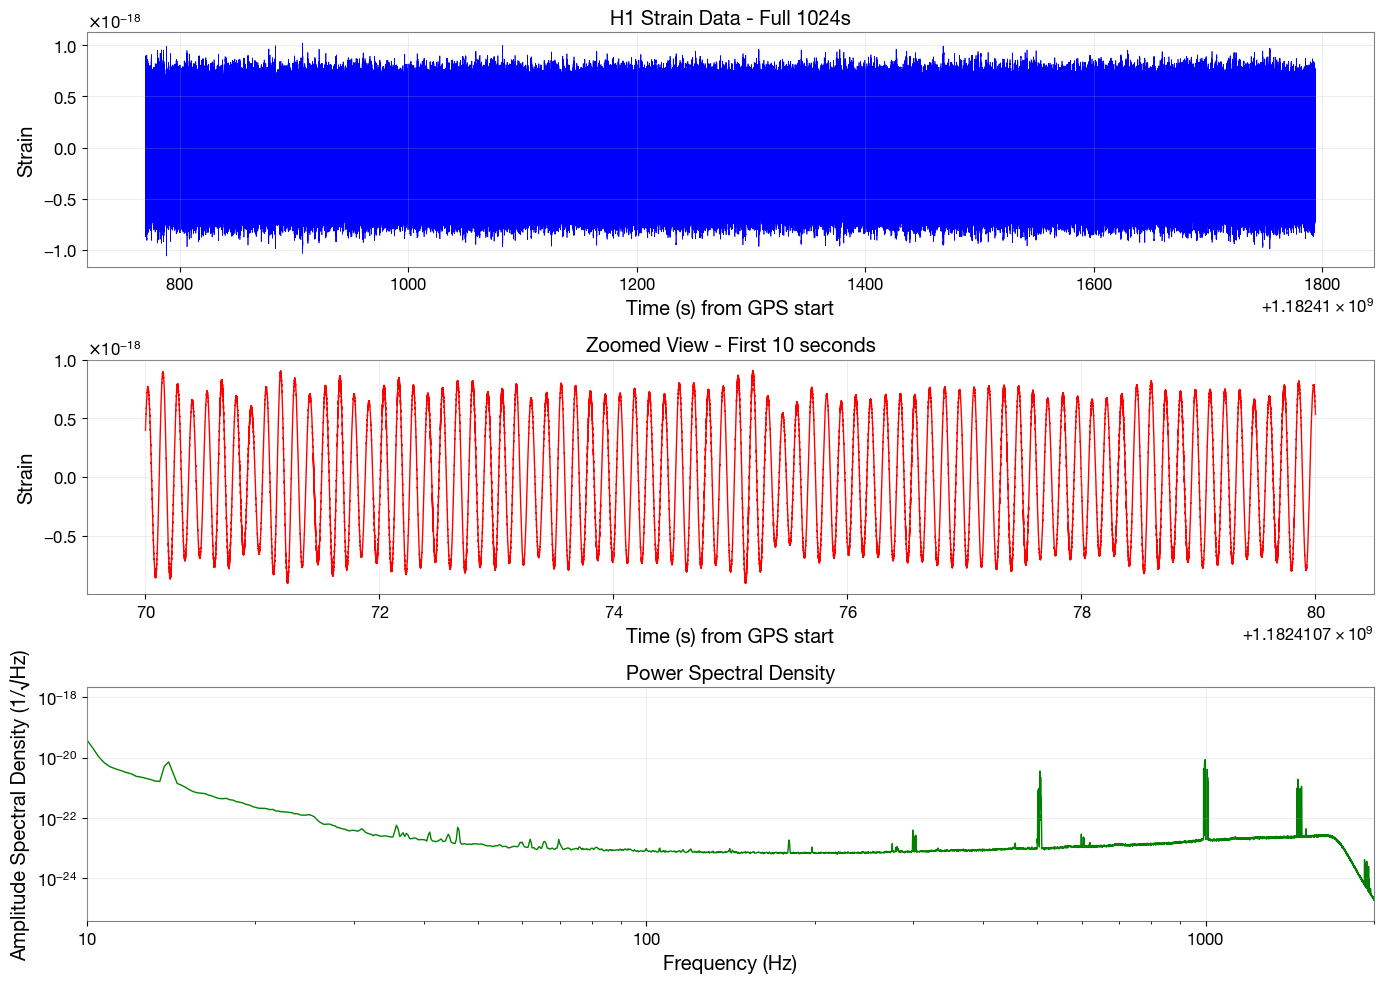

In [23]:
# Visualize LIGO data
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# 1. Time series plot (full duration)
axes[0].plot(data.times.value, data.value, 'b-', linewidth=0.5)
axes[0].set_xlabel('Time (s) from GPS start')
axes[0].set_ylabel('Strain')
axes[0].set_title(f'{detector} Strain Data - Full {duration}s')
axes[0].grid(True, alpha=0.3)

# 2. Zoomed time series (first 10 seconds)
zoom_duration = 10
zoom_mask = data.times.value <= (data.times.value[0] + zoom_duration)
axes[1].plot(data.times.value[zoom_mask], data.value[zoom_mask], 'r-', linewidth=1)
axes[1].set_xlabel('Time (s) from GPS start')
axes[1].set_ylabel('Strain')
axes[1].set_title(f'Zoomed View - First {zoom_duration} seconds')
axes[1].grid(True, alpha=0.3)

# 3. Power Spectral Density (PSD)
psd = data.psd(fftlength=4, overlap=2)
axes[2].loglog(psd.frequencies.value, np.sqrt(psd.value), 'g-', linewidth=1)
axes[2].set_xlabel('Frequency (Hz)')
axes[2].set_ylabel('Amplitude Spectral Density (1/√Hz)')
axes[2].set_title('Power Spectral Density')
axes[2].set_xlim(10, 2000)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()